# Лінійна регресія: перенавчання та регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

У всіх комірках, де написано коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Інші комірки з кодом (без коментарів) потрібно просто виконати. Крім того, у завданні потрібно відповідати на запитання; відповіді слід вписувати після виділеного слова "Відповідь:".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Ми будемо працювати з датасетом "bikes_rent.csv", в якому щодня записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів цього дня. Останнє ми передбачатимемо; таким чином, ми вирішуватимемо завдання регресії.

### Знакомство с данными

# Завдання 1

Завантажте датасет за допомогою функції pandas.read_csv у змінну df. Виведіть перші 5 рядків, щоб переконатися у коректному зчитуванні даних:

In [2]:
df = pd.read_csv("bikes_rent.csv")

print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


In [3]:
missing_sum = df.isnull().sum()

print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Сума пропусків в кожній колонці: 
season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64


In [4]:
print("Тип даних: \n", df.dtypes)

Тип даних: 
 season              int64
yr                  int64
mnth                int64
holiday             int64
weekday             int64
workingday          int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed(mph)    float64
windspeed(ms)     float64
cnt                 int64
dtype: object


Для кожного дня прокату відомі такі ознаки:

* _season_: 1 - весна, 2 - літо, 3 - осінь, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: від 1 до 12
* _holiday_: 0 – немає свята, 1 – є свято
* _weekday_: від 0 до 6
* _workingday_: 0 - неробочий день, 1 - робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура у Цельсіях
* _atemp_: температура по відчуттям у Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях на годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, його ми передбачатимемо)

Отже, у нас є дійсні, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як із речовими. З номінальними ознаками теж можна працювати як із дійсними, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від інших

Побудуйте графіки залежностей атрибутів від кількості подорожей. Тобто вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибуту від змінної **cnt**.

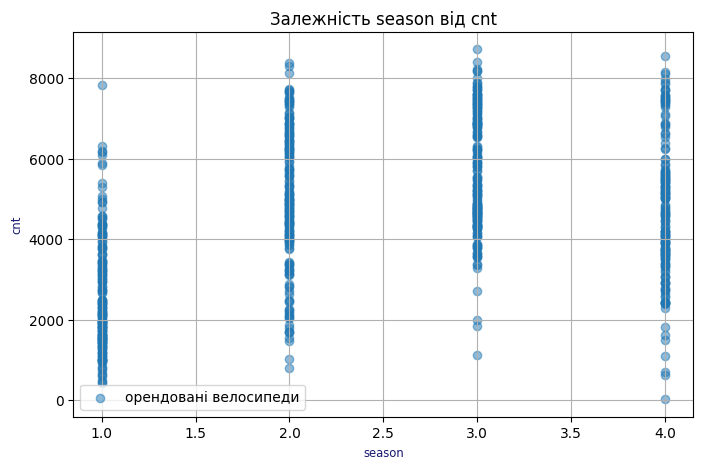

In [5]:
y = df['season']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('season', fontsize='small', color='midnightblue')
plt.title('Залежність season від cnt')
plt.legend()
plt.grid(True)
plt.show()

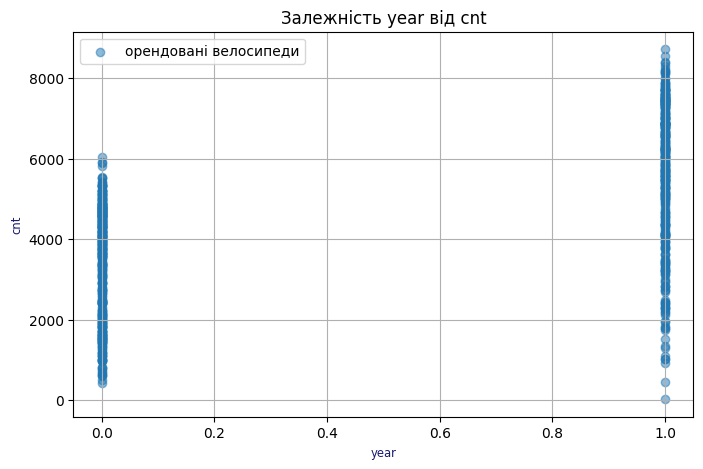

In [6]:
y = df['yr']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('year', fontsize='small', color='midnightblue')
plt.title('Залежність year від cnt')
plt.legend()
plt.grid(True)
plt.show()

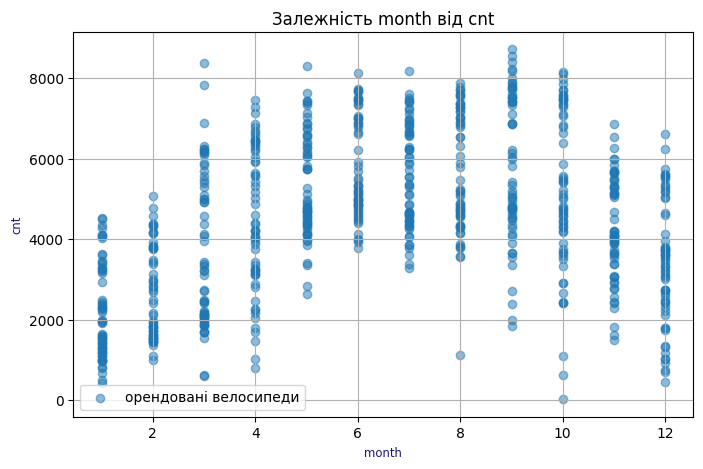

In [7]:
y = df['mnth']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('month', fontsize='small', color='midnightblue')
plt.title('Залежність month від cnt')
plt.legend()
plt.grid(True)
plt.show()

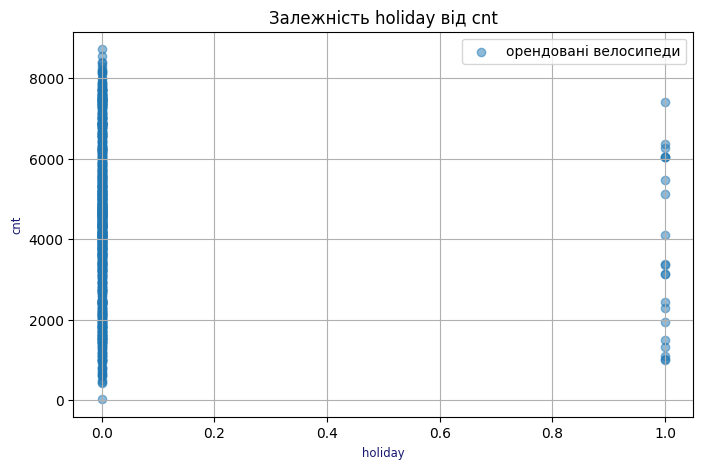

In [8]:
y = df['holiday']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('holiday', fontsize='small', color='midnightblue')
plt.title('Залежність holiday від cnt')
plt.legend()
plt.grid(True)
plt.show()

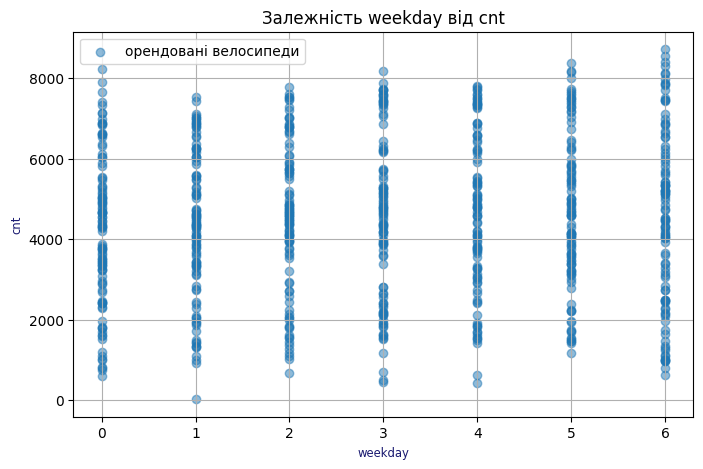

In [9]:
y = df['weekday']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('weekday', fontsize='small', color='midnightblue')
plt.title('Залежність weekday від cnt')
plt.legend()
plt.grid(True)
plt.show()

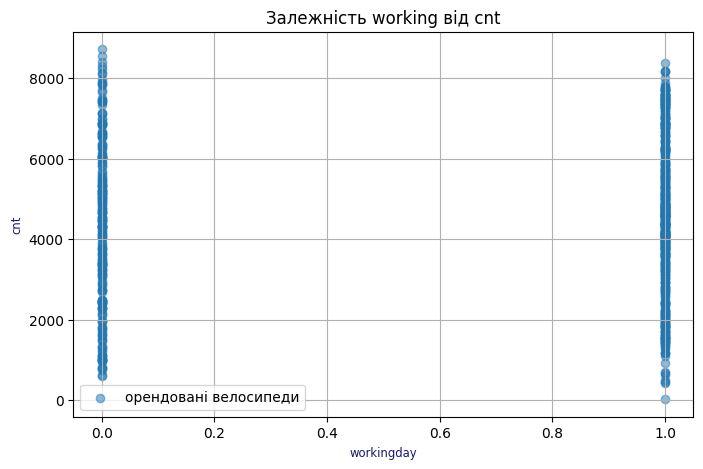

In [10]:
y = df['workingday']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('workingday', fontsize='small', color='midnightblue')
plt.title('Залежність working від cnt')
plt.legend()
plt.grid(True)
plt.show()

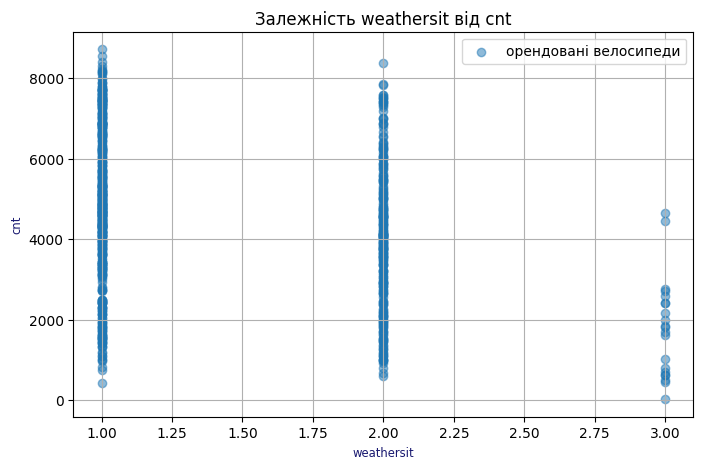

In [11]:
y = df['weathersit']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('weathersit', fontsize='small', color='midnightblue')
plt.title('Залежність weathersit від cnt')
plt.legend()
plt.grid(True)
plt.show()

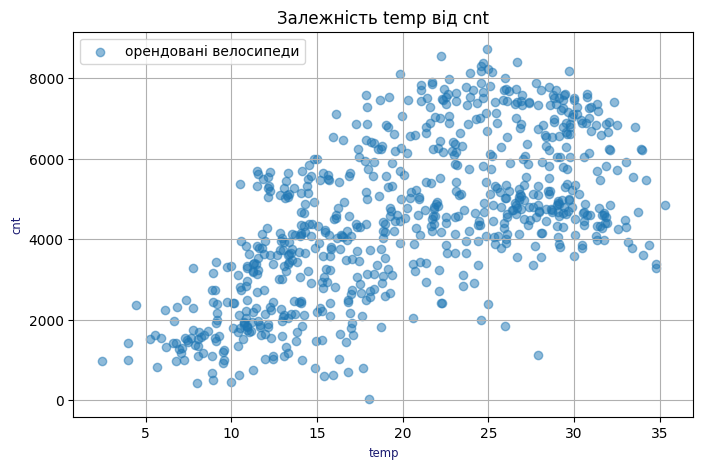

In [12]:
y = df['temp']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('temp', fontsize='small', color='midnightblue')
plt.title('Залежність temp від cnt')
plt.legend()
plt.grid(True)
plt.show()

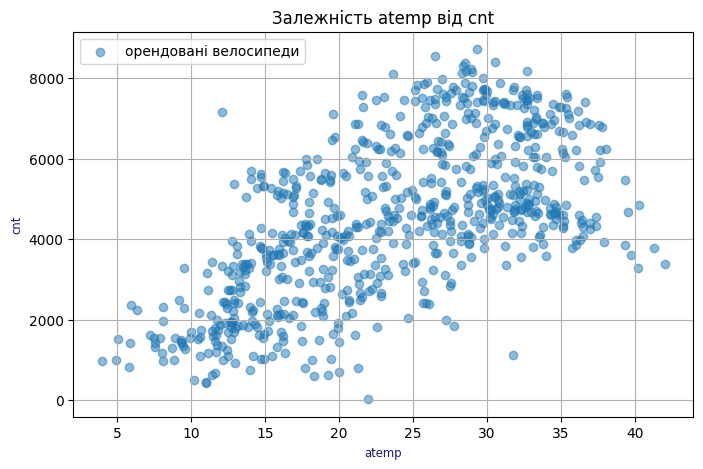

In [13]:
y = df['atemp']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('atemp', fontsize='small', color='midnightblue')
plt.title('Залежність atemp від cnt')
plt.legend()
plt.grid(True)
plt.show()

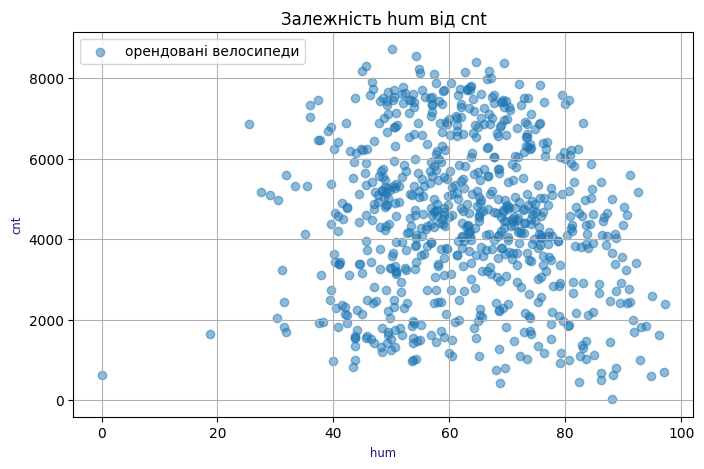

In [14]:
y = df['hum']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('hum', fontsize='small', color='midnightblue')
plt.title('Залежність hum від cnt')
plt.legend()
plt.grid(True)
plt.show()

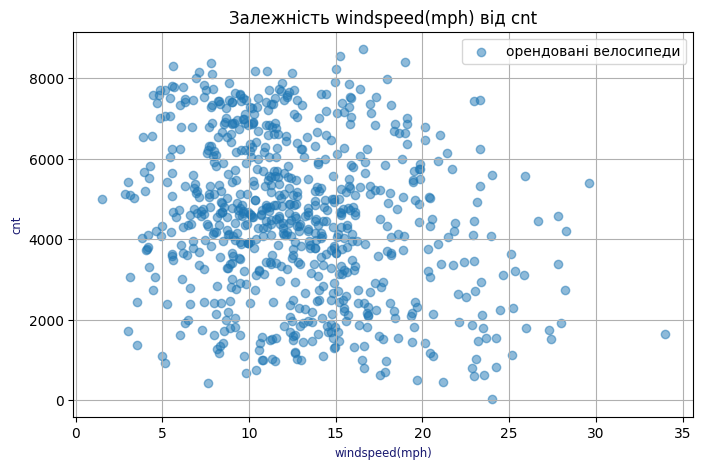

In [15]:
y = df['windspeed(mph)']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('windspeed(mph)', fontsize='small', color='midnightblue')
plt.title('Залежність windspeed(mph) від cnt')
plt.legend()
plt.grid(True)
plt.show()

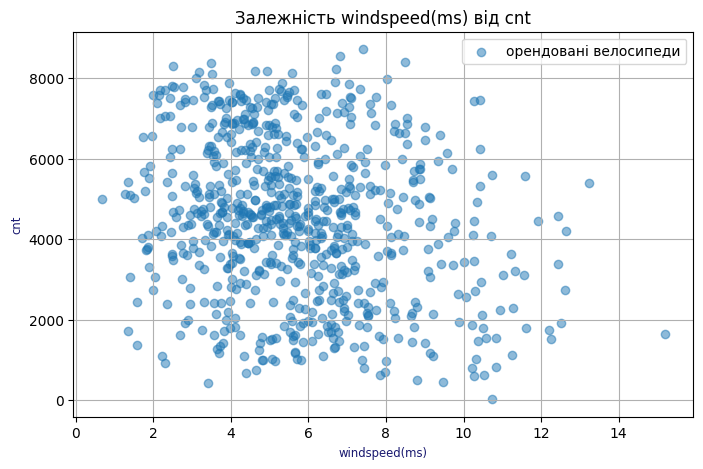

In [16]:
y = df['windspeed(ms)']
x = df['cnt']

plt.figure(figsize=(8, 5))
plt.scatter(y,x, label='орендовані велосипеди', alpha = 0.5)
plt.ylabel('cnt', fontsize='small', color='midnightblue')
plt.xlabel('windspeed(ms)', fontsize='small', color='midnightblue')
plt.title('Залежність windspeed(ms) від cnt')
plt.legend()
plt.grid(True)
plt.show()

Питання:
1. Який характер залежності кількості прокатів від місяця?
1. Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно


1. Питання: Який характер залежності кількості прокатів від місяця?
   Відповідь: Залежність кількості прокатів від місяця має неоднорідний характер. На графіку можна помітити, що кількість прокатів сезонно змінюється,
   з піками в літній та осінній сезон і меншими значеннями взимку та весною. Тобто, ця залежність більше схожа на квадратичну або нелінійну залежність.
2. Питання: Вкажіть одну чи дві ознаки, від яких кількість прокатів швидше за все залежить лінійно
Відповідь: Від цих ознак кількість прокатів швидше за все залежить лінійно - температура,  температура по відчуття, : вологіс, ): швидкість ву.унду

# Завдання 2

Давайте суворо оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Для її обчислення в pandas можна використовувати методи датафрейму: corr та corrwith.

Порахуйте кореляції всіх ознак, крім останньої, з останнім за допомогою методу `corrwith`.

In [17]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])

print("Kореляції всіх ознак, крім останньої, з останнім за допомогою методу corrwith: \n", correlations)

Kореляції всіх ознак, крім останньої, з останнім за допомогою методу corrwith: 
 season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


У вибірці є ознаки, що корелюють із цільовим, а отже, завдання можна вирішувати лінійними методами.

По графікам видно, деякі ознаки схожі один на одного. Тому давайте також порахуємо кореляції між дійсними ознаками.

# Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) та cnt
за допомогою методу corr:

In [18]:
pcorrelations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()

print("Попарні кореляції: \n", pcorrelations)

Попарні кореляції: 
                     temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


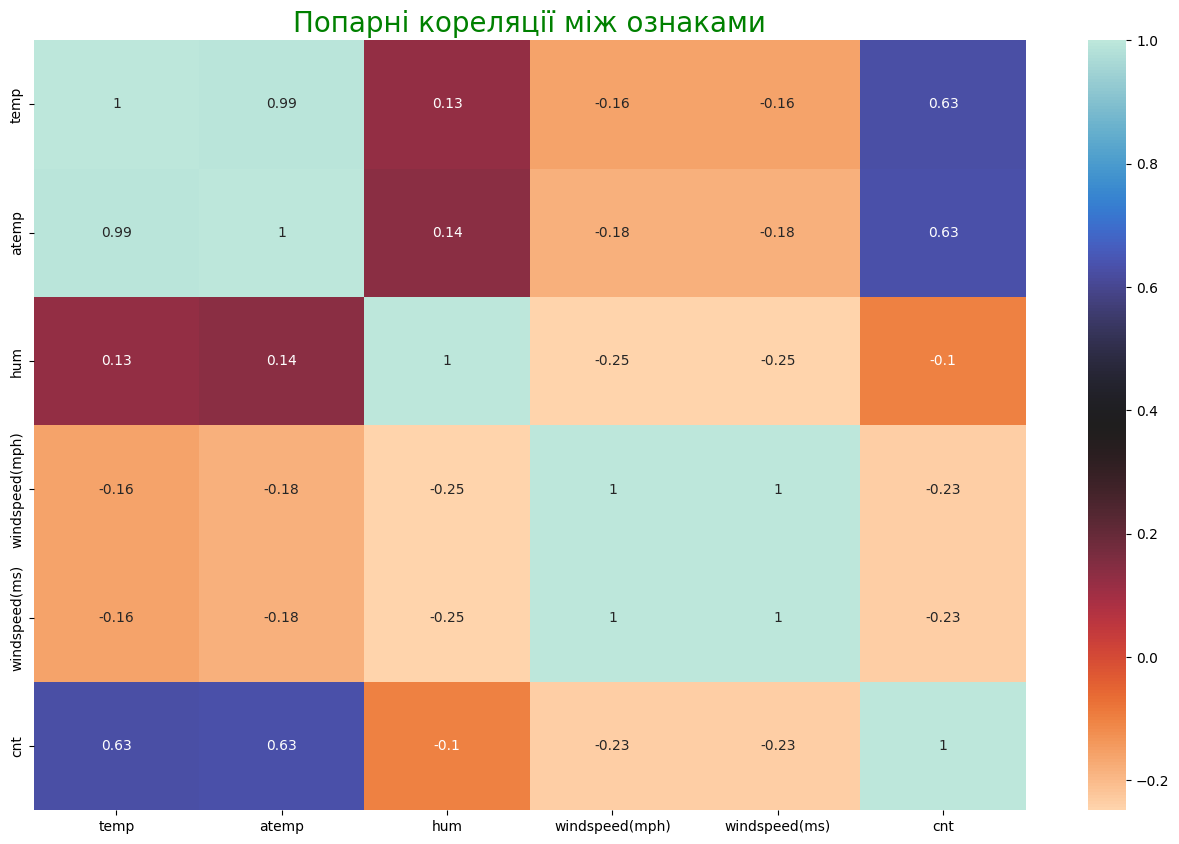

In [19]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (бо це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно впливає на навчання лінійної моделі.

# Завдання 4

Виведіть середні ознаки

In [20]:
print("Cередні ознаки: \n", df.mean())

Cередні ознаки: 
 season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, в наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б відразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо його середнє і поділимо стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, потрібно перемішати вибірку, це буде потрібно для крос-валідації.

In [21]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [22]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [23]:
from sklearn.linear_model import LinearRegression

# Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються в змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.

In [24]:
reg = LinearRegression().fit(X, y)
[i for i in list(zip(df.columns, reg.coef_))]

[('season', 570.863641661725),
 ('yr', 1021.9604245185086),
 ('mnth', -141.3006331900142),
 ('holiday', -86.75760471139698),
 ('weekday', 137.2272583151452),
 ('workingday', 56.38980357474366),
 ('weathersit', -330.2271825899341),
 ('temp', 367.4799030832653),
 ('atemp', 585.5521797658965),
 ('hum', -145.6155228231448),
 ('windspeed(mph)', 12454356291009.727),
 ('windspeed(ms)', -12454356291208.188)]

Ми бачимо, що ваги при лінійно-залежних ознаках по модулю значно більші, ніж за інших ознак. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі у методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим меншим є визначник цієї матриці і тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколлінеарності_.

З парою (temp, atemp) трохи менш корелюючих змінних такого не сталося, проте на практиці завжди варто уважно стежити за коефіцієнтами за схожих ознак.

Для того, щоб вирішити проблему мультиколінеарності, потрібно скористатися регуляризатором. До функціонала, що оптимізується, додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а в другому --- Ridge.

# Завдання 6
Давайте спробуємо навчити лінійні моделі з L_1 і L_2-регуляризацією, а далі порівняємо їх ваги. Навчіть регресори Ridge і Lasso з параметрами за промовчанням і переконайтеся, що проблема з вагами вирішилася.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги

In [25]:
from sklearn.linear_model import Lasso, Ridge

In [26]:
lasso = Lasso().fit(X, y)
[i for i in list(zip(df.columns, lasso.coef_))]

[('season', 560.2416160308861),
 ('yr', 1019.4634940657196),
 ('mnth', -128.73062703678696),
 ('holiday', -86.15278133371106),
 ('weekday', 137.34789390496314),
 ('workingday', 55.21237064135668),
 ('weathersit', -332.3698569623487),
 ('temp', 376.3632362096943),
 ('atemp', 576.530793504555),
 ('hum', -144.12915500348583),
 ('windspeed(mph)', -197.1396894024843),
 ('windspeed(ms)', -2.8051404183533485e-08)]

Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги

In [27]:
ridge = Ridge().fit(X, y)
[i for i in list(zip(df.columns, ridge.coef_))]

[('season', 563.0645722520164),
 ('yr', 1018.9483787875275),
 ('mnth', -131.87332028247582),
 ('holiday', -86.74609799709243),
 ('weekday', 138.00511117871926),
 ('workingday', 55.90311037506429),
 ('weathersit', -332.34978849907236),
 ('temp', 386.45788919189926),
 ('atemp', 566.3470470600766),
 ('hum', -145.0713272986732),
 ('windspeed(mph)', -99.25944108174306),
 ('windspeed(ms)', -99.25944115438946)]

### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги за деяких ознак Давайте поспостерігаємо, як змінюються ваги при збільшенні коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги в список `coefs_ridge'` Конвертуйте отримані списки в `np.array`.

In [28]:
alphas = np.arange(1, 500, 50)

coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for index, a in enumerate(alphas):
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs_lasso[index] = lasso.coef_

for index, a in enumerate(alphas):
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs_ridge[index] = ridge.coef_

Проаналізуйте динаміку ваги при збільшенні параметра регуляризації:

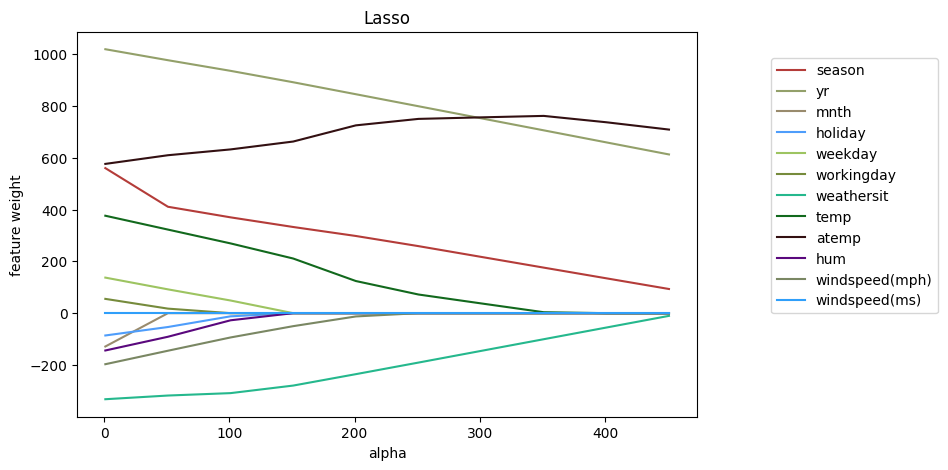

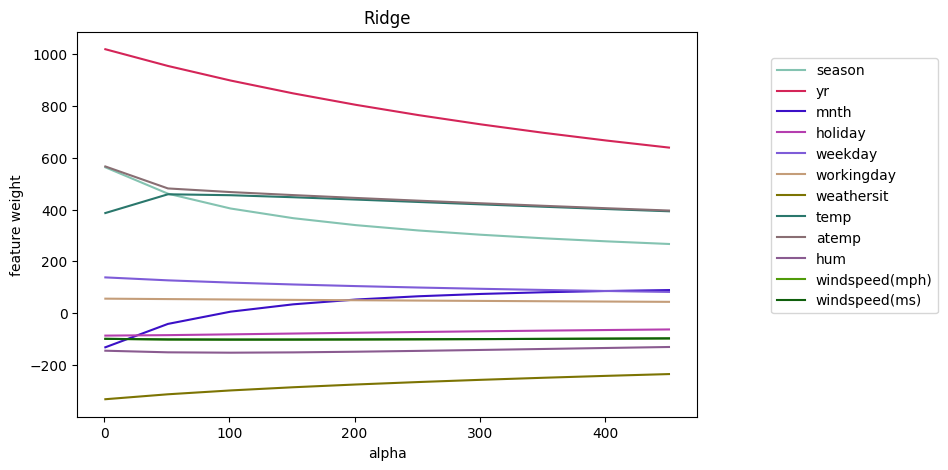

In [29]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` за будь-якого значення `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт за нього менше $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

Відповіді:
1. Lasso агресивніше зменшує ваги при тому самому alpha порівняно з Ridge. Lasso використовує L1-регуляризацію, яка має тенденцію встановлювати коефіцієнти ваги близькими до нуля для деяких ознак, що робить її більш агресивною в зменшенні ваги.2.  Якщо alpha велике в Lasso, то багато коефіцієнтів ваги стають точно нульовими. Це трапляється через те, що Lasso має умову, яка штрафує великі значення коефіцієнтів ваги, і цілеспрямовано старається зменшити їх до нуля. Це використовується для відбору ознак
3.   Так, Lasso виключить одну з ознак windspeed за будь-якого значення alpha > 0, оскільки вона має менший коефіцієнт ваги, ніж $10^{-3}$. У випадку Ridge, коефіцієнти ваги ніколи не стають точно нульовими, вони тільки наближаються до нуля за рахунок регуляризації, але не досягають його, тому Ridge не виключає жодну ознак
4. 
  Lasso є більш підходящим регуляризатором для відбору неінформативних ознак, оскільки він може зменшити коефіцієнти ваги до нуля, що означає виключення цих ознак з моделі. Ridge, хоча і зменшує коефіцієнти ваги, не виключає жодну ознаку повністю.


### Завдання 8

Далі працюватимемо з `Lasso`.

Отже, бачимо, що з зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику функціонал методу найменших квадратів, що сам оптимізується, тобто `Mean Square Error`.

По-друге, треба зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не …анія на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити кілька розбиття вибірки, на кожному пробувати різні значення alpha, а потім усереднити MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ часто, і щоразу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn дуже просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список з alpha і кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор міститиме змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (кількість блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків . Крім того, в змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а coef\_, традиційно, навчені ваги, відповідні цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, в якому він проходить через alphas; Для порівняння з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` залежно від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [30]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

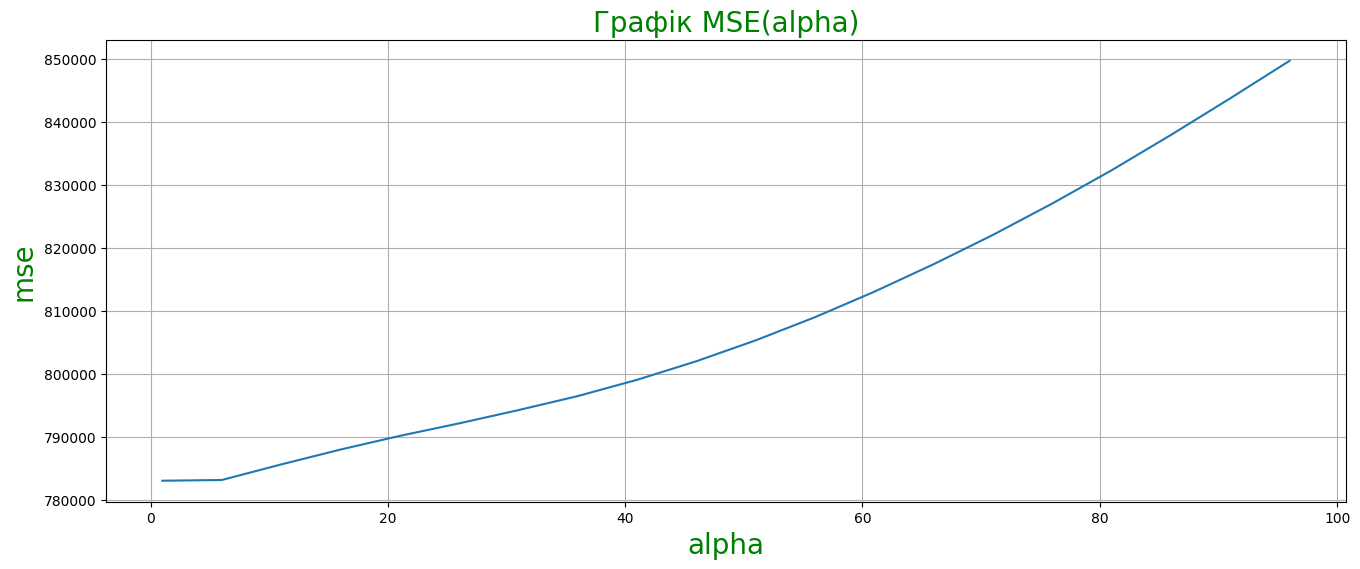

Alpha = 1


[('season', 560.2416160308861),
 ('yr', 1019.4634940657196),
 ('mnth', -128.73062703678696),
 ('holiday', -86.15278133371106),
 ('weekday', 137.34789390496314),
 ('workingday', 55.21237064135668),
 ('weathersit', -332.3698569623487),
 ('temp', 376.3632362096943),
 ('atemp', 576.530793504555),
 ('hum', -144.12915500348583),
 ('windspeed(mph)', -197.1396894024843),
 ('windspeed(ms)', -2.8051404183533485e-08)]

In [31]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor =  LassoCV(alphas=alphas).fit(X, y)

mse = [i.mean() for i in regressor.mse_path_]

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(regressor.alphas_, mse)
plt.title('Графік MSE(alpha)', fontsize=20, color='g')
plt.xlabel("alpha", fontsize=20, color='g')
plt.ylabel("mse", fontsize=20, color='g')
plt.grid()
plt.show()

print(f'Alpha = {regressor.alpha_}')
[i for i in list(zip(df.columns, regressor.coef_))]

Отже, ми вибрали певний параметр регулювання. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбиття (тобто по стовпцях).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.

Alpha = 1, MSE = 691447.2507878067
Alpha = 11, MSE = 883471.1829425399
Alpha = 1, MSE = 710110.162411734
Alpha = 26, MSE = 860737.405948872
Alpha = 21, MSE = 750676.3567790003


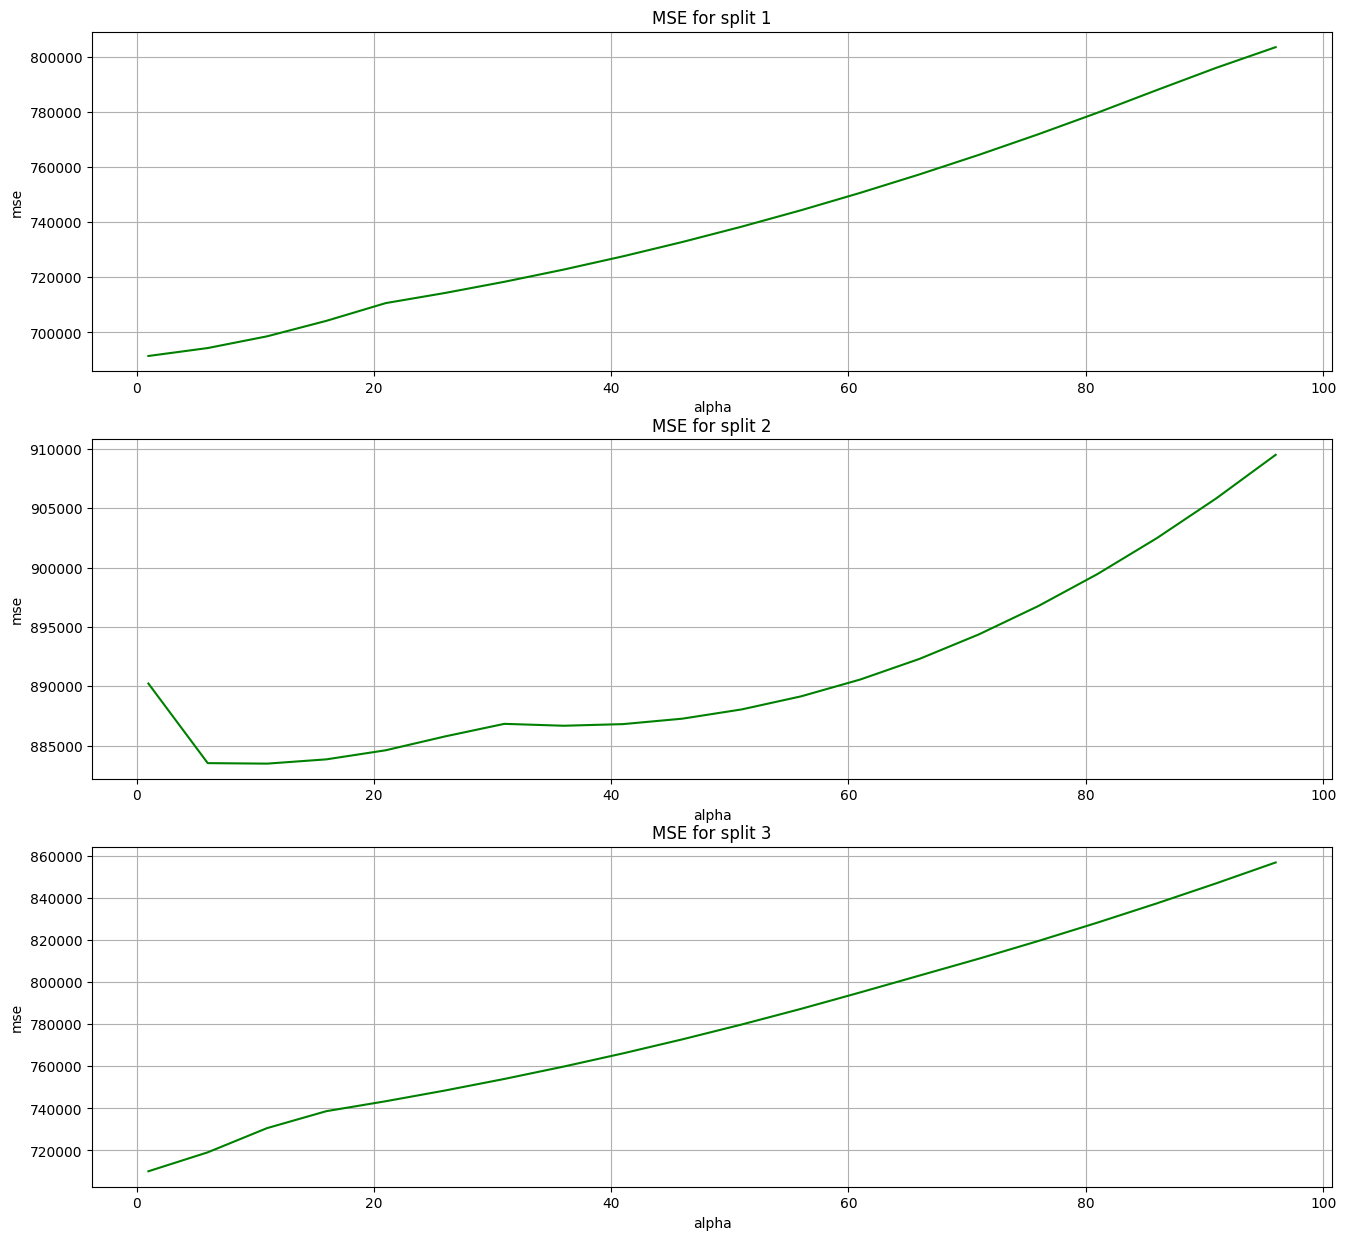

In [32]:
for i in range(3):
    plt.rcParams["figure.figsize"] = (16, 15)
    plt.subplot(3, 1, i+1)
    plt.plot(regressor.alphas_, regressor.mse_path_[:, i], c='g')
    plt.title(f'MSE for split {i+1}')
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.grid()

for alpha, mse in enumerate(np.min(regressor.mse_path_, axis=0)):
    alpha_min = regressor.mse_path_[:, alpha].argmin(axis=0)
    print(f'Alpha = {regressor.alphas_[alpha_min]}, MSE = {mse}')

На кожному розбиття оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиття. Виходить, що ми налаштовуємось на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо щось "середнє", що даватиме прийнятне значення метрики на різних розбиття вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, проінтерпретуємо результат. Дайте відповідь на наступні запитання.

#### Питання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей cnt від цих ознак, які ми малювали в блоці "Знайомство з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

In [33]:
top4poz = df.columns[np.argsort(-coefs_ridge[-1])][:4]

print("4 ознаки з найбільшими позитивними коефіцієнтами: \n", top4poz)

4 ознаки з найбільшими позитивними коефіцієнтами: 
 Index(['yr', 'atemp', 'temp', 'season'], dtype='object')


Відповідь:
1. Так, прослідковується зростаюча лінійна залежність cnt від atemp та temp, тобто по температурі повітря (по відчуттю).
2. Так, якщо температура (по відчуттям) буде зростати лише до приблизно 30 градусів, адже якщо більше градусів то кількість прокату зменшується.

#### Питання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться відповідні візуалізації. Чи видно лінійну залежність, яка зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

Відповідь:
1. Так, графіки залежності cnt від weathersit, hum, windspeed(ms) виглядають, як лінійні залежністі, які зменшуються.
2. Так, адже, наприклад, коли збільшується число weathersit, то це означає погіршення погодніх умов.

In [34]:
top3neg = df.columns[np.argsort(coefs_ridge[-1])][:3]

print("3 ознаки з найбільшими модулем негативними коефіцієнтами: \n", top3neg)

3 ознаки з найбільшими модулем негативними коефіцієнтами: 
 Index(['weathersit', 'hum', 'windspeed(ms)'], dtype='object')


#### Питання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (<1e-3). Як ви вважаєте, чому модель виключила їх із моделі (знов подивіться на графіки)? Чи правда, що вони не впливають на попит на велосипеди?

Відповідь:
1. Модель Lasso зменшує коефіцієнти цих ознак до нульових значень, оскільки регуляризація L1, використовувана в Lasso, прагне зменшити ваги найменших важливих ознак до нуля для виключення їх впливу на прогноз.
2. Це не обов'язково означає, що ці ознаки не впливають на попит на велосипеди. Вони просто можуть мати менший вплив порівняно з іншими ознаками, які мають більші коефіцієнти (season, yr, atemp).

In [35]:
zero_coeffs = []
for feature, coef in zip(df.columns, coefs_lasso[-1]):
    if np.abs(coef) < 1e-3:
        zero_coeffs.append(feature)
print("Oзнаки з коефіцієнтами, близькими до нуля (<1e-3): \n", zero_coeffs)

Oзнаки з коефіцієнтами, близькими до нуля (<1e-3): 
 ['mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed(mph)', 'windspeed(ms)']


### Висновок
напишіть висновок

Отже, на практичній роботі я навчилася регуляції Lasso(L1) та Ridge(L2) і як вони використовуються для контролю перенавчання та відбору ознак у моделях машинного навчання. Також я  дослідиаи вплив різних значень гіперпараметра alpha на коефіцієнти моделей Lasso та Ridge та зрозуміаи, які ознаки стають більш або менш важливими при зміні alpha Вивчила, як регуляризація може призводити до відбору ознак та виключення менш важливих з моделі та побачила  впли  ознак на цільову змінну за допомогою аналізу коефіцієнтів та графічного відображення залежностей..